# Load the data

In [1]:
from sklearn.model_selection import train_test_split

import shap

X, y = shap.datasets.diabetes()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Decision Tree Regressor

In [2]:
from sklearn import tree

dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=20)

# Explain all the predictions in the test set

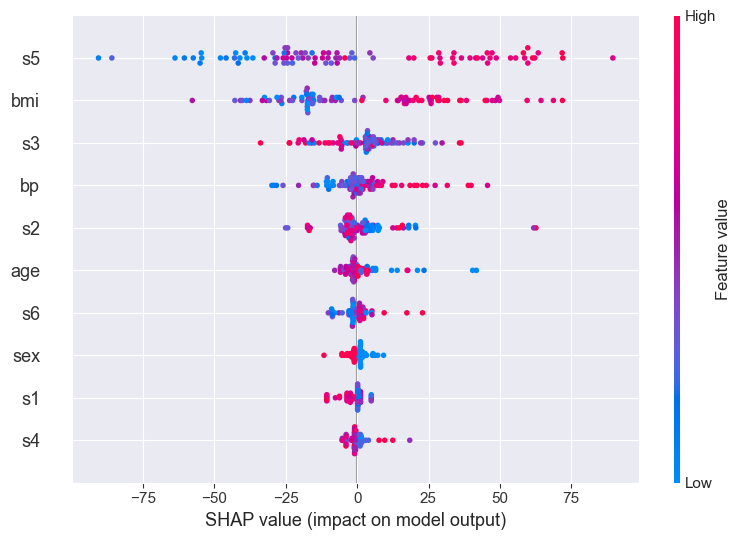

In [3]:
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

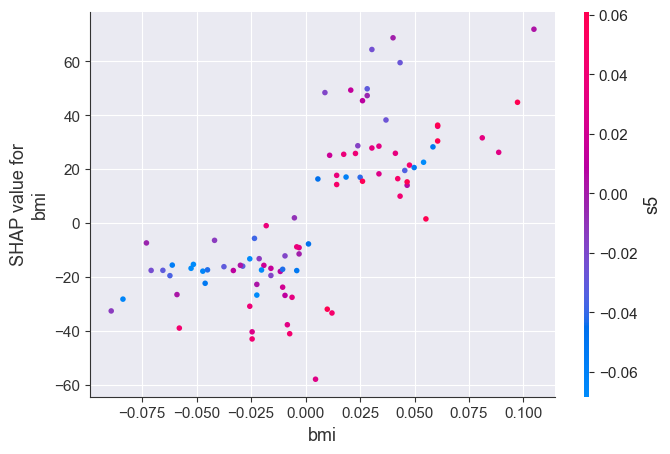

In [4]:
shap.dependence_plot("bmi", shap_values, X_test)

In [6]:
initjs = shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test)